Carlisle December 2015 Rainfall Data

Nearest grid point to Carlisle:
Latitude: 54.900°N
Longitude: -2.897°E
Rainfall in Carlisle for December 2015 (mm/day):
Dec 1: 3.0 mm
Dec 2: 2.4 mm
Dec 3: 25.1 mm
Dec 4: 21.4 mm
Dec 5: 29.2 mm
Dec 6: 1.1 mm
Dec 7: 0.8 mm
Dec 8: 11.6 mm
Dec 9: 8.9 mm
Dec 10: 4.9 mm
Dec 11: 1.5 mm
Dec 12: 12.9 mm
Dec 13: 2.0 mm
Dec 14: 0.5 mm
Dec 15: 0.7 mm
Dec 16: 0.4 mm
Dec 17: 0.3 mm
Dec 18: 1.4 mm
Dec 19: 8.7 mm
Dec 20: 6.7 mm
Dec 21: 15.9 mm
Dec 22: 4.5 mm
Dec 23: 7.5 mm
Dec 24: 2.3 mm
Dec 25: 26.5 mm
Dec 26: 20.5 mm
Dec 27: 0.3 mm
Dec 28: 0.4 mm
Dec 29: 1.7 mm
Dec 30: 4.0 mm
Dec 31: 6.5 mm

Total December rainfall in Carlisle: 233.4 mm


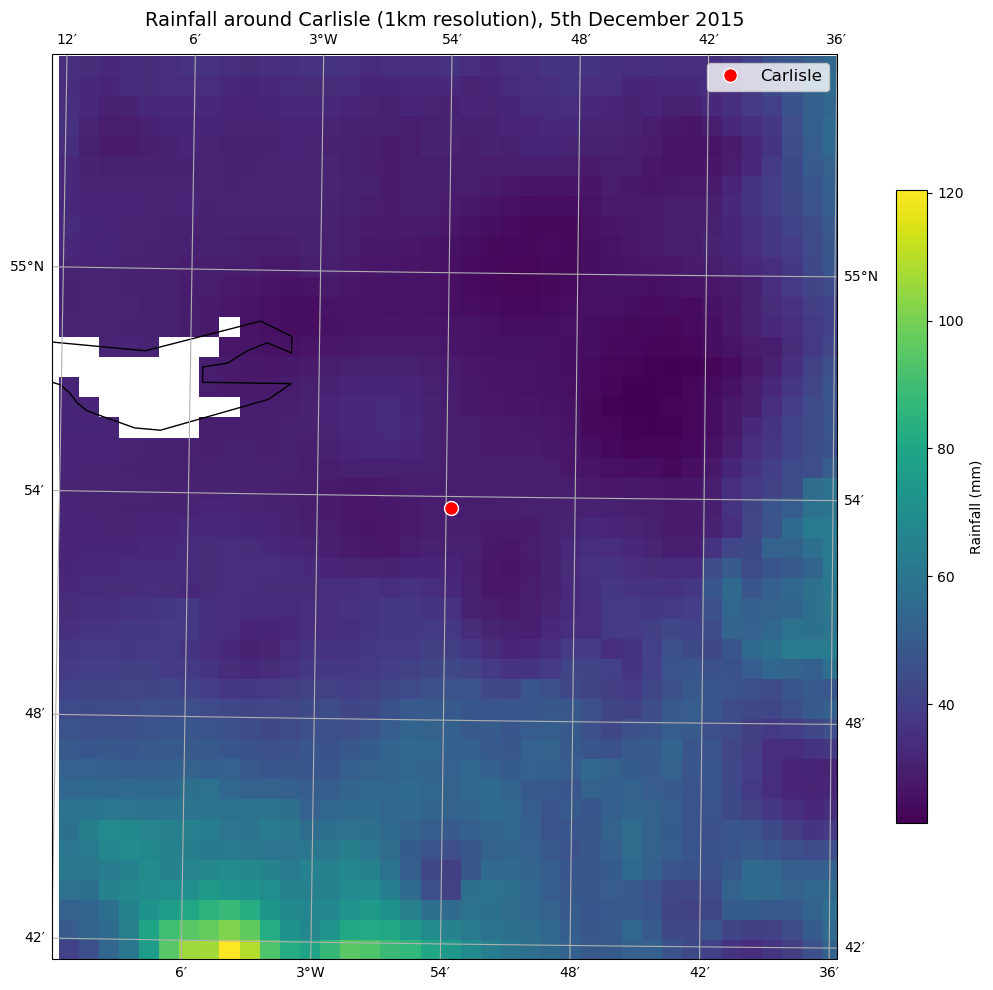

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

ds = xr.open_dataset("rainfall_hadukgrid_uk_1km_day_20151201-20151231.nc")

# Carlisle coordinates
carlisle_lat = 54.9
carlisle_lon = -2.9

# Find the nearest grid point to Carlisle
lat_diff = np.abs(ds["latitude"] - carlisle_lat)
lon_diff = np.abs(ds["longitude"] - carlisle_lon)
distance = np.sqrt(lat_diff**2 + lon_diff**2)
min_idx = np.unravel_index(distance.argmin(), distance.shape)
y_idx, x_idx = min_idx

print(f"Nearest grid point to Carlisle:")
print(f"Latitude: {ds['latitude'][y_idx, x_idx].values:.3f}°N")
print(f"Longitude: {ds['longitude'][y_idx, x_idx].values:.3f}°E")

# Extract rainfall for Carlisle
rain_carlisle = ds["rainfall"][:, y_idx, x_idx]

print("Rainfall in Carlisle for December 2015 (mm/day):")
for i, val in enumerate(rain_carlisle.values):
    print(f"Dec {i+1}: {val:.1f} mm")

total_rain = rain_carlisle.sum().values
print(f"\nTotal December rainfall in Carlisle: {total_rain:.1f} mm")


# Select only the region around Carlisle for faster plotting
# Define the region bounds
lat_min, lat_max = 54.7, 55.1
lon_min, lon_max = -3.2, -2.6

# Find the indices for this region
mask_lat = (ds["latitude"] >= lat_min) & (ds["latitude"] <= lat_max)
mask_lon = (ds["longitude"] >= lon_min) & (ds["longitude"] <= lon_max)
mask = mask_lat & mask_lon

# Get the bounding box indices
y_indices = np.where(mask.any(axis=1))[0]
x_indices = np.where(mask.any(axis=0))[0]

y_start, y_end = y_indices[0], y_indices[-1] + 1
x_start, x_end = x_indices[0], x_indices[-1] + 1


# Extract just this region
rain = ds["rainfall"].isel(time=4)[y_start:y_end, x_start:x_end]
lons = ds["longitude"][y_start:y_end, x_start:x_end]
lats = ds["latitude"][y_start:y_end, x_start:x_end]

# Make the map
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.OSGB())
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Zoom to Carlisle area
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot rainfall
mesh = ax.pcolormesh(lons, lats, rain, transform=ccrs.PlateCarree(), 
                     cmap='viridis', shading='auto')
plt.colorbar(mesh, label="Rainfall (mm)", shrink=0.7)

# Mark Carlisle with a red star
ax.plot(ds['longitude'][y_idx, x_idx], ds['latitude'][y_idx, x_idx], 
        'r.', markersize=20, transform=ccrs.PlateCarree(), 
        label='Carlisle', markeredgecolor='white', markeredgewidth=1)
plt.legend(loc='upper right', fontsize=12)

plt.title("Rainfall around Carlisle (1km resolution), 5th December 2015", fontsize=14)
plt.tight_layout()
plt.show()